<a href="https://colab.research.google.com/github/PromitHal/AI_ML/blob/main/PimaIndianDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np


In [221]:
data=pd.read_csv('diabetes.csv',header=0)

In [222]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [223]:
data.shape

(768, 9)

In [224]:
import seaborn as sns

In [225]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]>

In [226]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Identifying outliers


In [227]:
import matplotlib.pyplot as plt

In [228]:
#Creating columns dataframe
colname=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

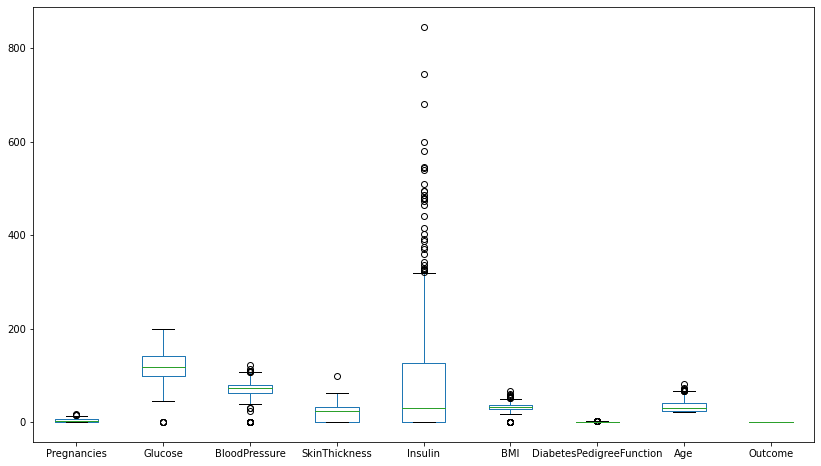

In [229]:

data.plot(kind='box',layout=(4,1),figsize=(14,8))

In [ ]:
#Identifying outliers from the boxplot
#From observation,every column has an outlier 


In [230]:
 upper_value=np.percentile(data[colname[5]],[75])[0]


In [231]:
lower_value=np.percentile(data[colname[5]],[25])[0]

In [232]:
upper_value-lower_value

9.3

In [ ]:
upper_value

36.6

In [238]:
X_new=data.drop(columns="Outcome",axis=1)

In [239]:
for j in range(X_new.shape[1]):
  upper_value=np.percentile(X_new[colname[j]],[75])[0]
  lower_value=np.percentile(X_new[colname[j]],[25])[0]
  #Determining interqartile range
  Iq_range=upper_value-lower_value
  X_new[colname[j]][(X_new[colname[j]]>(upper_value+1.5*Iq_range))]=1.5*Iq_range+upper_value
  X_new[colname[j]][(X_new[colname[0]]<(lower_value-1.5*Iq_range))]=lower_value-1.5*Iq_range

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value

In [235]:
X_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,37.125,35,35,0.0,13.35,0.627,50.0
1,1.0,37.125,35,29,0.0,13.35,0.351,31.0
2,8.0,37.125,35,0,0.0,13.35,0.672,32.0
3,1.0,37.125,35,23,94.0,13.35,0.167,21.0
4,0.0,37.125,35,35,168.0,13.35,1.200,33.0


In [236]:
X_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000,768.0,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.840495,37.125,35.0,20.511719,73.971029,15.548698,0.460486,33.222005
std,3.354094,0.000,0.0,15.844744,94.466654,6.650431,0.289989,11.694916
min,0.000000,37.125,35.0,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,37.125,35.0,0.000000,0.000000,13.350000,0.243750,24.000000
50%,3.000000,37.125,35.0,23.000000,30.500000,13.350000,0.372500,29.000000
75%,6.000000,37.125,35.0,32.000000,127.250000,13.350000,0.626250,41.000000
max,15.000000,37.125,35.0,80.000000,375.000000,52.300000,1.391000,72.000000


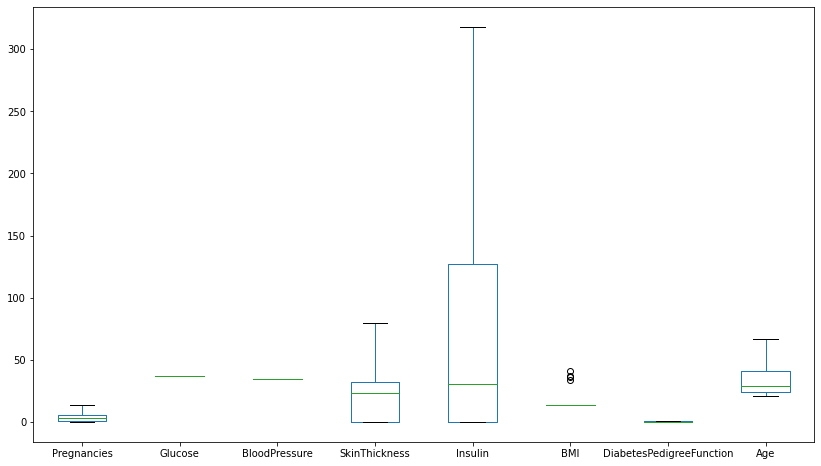

In [240]:
#Now plotting boxplots
X_new.plot(kind='box',layout=(4,1),figsize=(14,8))

In [ ]:
#now,most of the outliers from our data has been eliminated and we can proceed towards building the model

**Logistic Regression Model**

In [241]:
#Features dataset
X=X_new

In [242]:
#Target dataset
Y=data["Outcome"]

In [243]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [244]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(614, 8)

In [188]:
X_test.shape

(154, 8)

In [245]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [246]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)


In [247]:
logreg.fit(X_train_scaled,Y_train)

LogisticRegression()

In [248]:
from sklearn.metrics import accuracy_score

In [ ]:
X_train_prediction[0]

In [249]:
X_prediction=logreg.predict(X_test_scaled)


In [250]:
training_data_accuracy=accuracy_score(X_prediction,Y_test)

In [251]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.5974025974025974
